# Дополнительное задание 2

В данном задании в качестве изучаемого метода машинного обучения выберем метод опорных векторов, который является популярным методом машинного обучеия для решения задач классфифкации и регресии. Давайте посавим задачи для данного метода при этом будем решать задачу классфифкации.

## Постановка задачи
Задача состоит в том, чтобы найти гиперплоскость, которая наилучшим образом разделяет классы данных. Для этого будем максимизировать зазор между гиперплоскостью и ближайшими точками каждого класса, которые называются опорными векторами.

Теперь попробуем формализоровать нашу задачу:

У нас есть данные в виде множества (xi, yi) размера n, где xi - это векторы признаков, а yi - это "метка" класса. Нам требуется найти гиперплоскость вида w * x + b = 0, которая разделяет данные.

## Как работает метод LinearSVC

Фактически мы должны решить данную проблему минимизации:

![formula](img.png)


В данном классе есть метод fit, который как раз отвечает за обучение. Для начала формулируется задача оптимизации для поиска гиперплоскости. Далее используются алгоритмы оптимизации, такие как метод стохастического градиентного спуска (SGD) или другие итерационные методы. По итоге мы находим находит параметры w и b, которые минимизируют функцию потерь.

## Немного про визуализацию
Часто данные содержат довольно большое количество призгаков, что влечет за собой проблему отрисовки многомерного простанства. Чтобы её решить будем выбирать два наиболее значимых признака и делать их проекцию на плоскость. Для этого воспользуемся методом PCA. PCA - это метод снижения размерности данных, широко используемый в машинном обучении и статистике. Он помогает уменьшить количество признаков (измерений) в данных, сохраняя при этом как можно больше информации. Это достигается путем преобразования исходных признаков в новые, некоррелированные переменные, называемые главными компонентами.

## Пример 1
Для начала возьмем данные, в которых собрана информация об ирисах. Это довольно популярный датасет, который активно используется для обучения. 

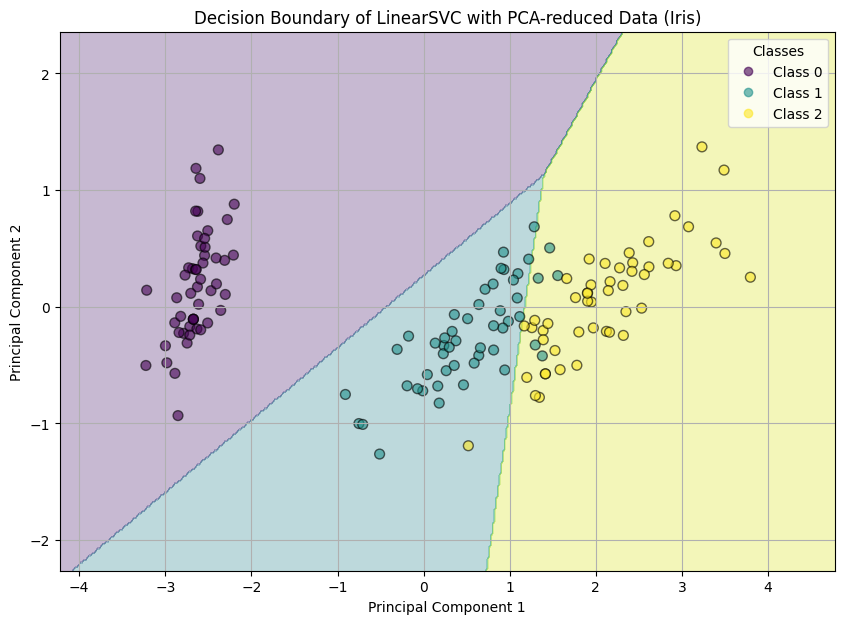

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

with open('iris.data', 'r') as f:
    data = [list(map(lambda x: float(x) if ord('0') <= ord(x[0]) <= ord('9') else x.replace('\n', ''),
                     line.split(','))) for line in f]

X = [st[0:4] for st in data]
y = [st[4] for st in data]
index = 0
classes = dict()
for i in range(len(y)):
    if y[i] not in classes:
        classes[y[i]] = index
        index += 1
    y[i] = classes[y[i]]

clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50, alpha=0.6)
plt.title('Decision Boundary of LinearSVC with PCA-reduced Data (Iris)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2'], title="Classes")
plt.grid(True)
plt.show()


## Пример 2
Далее попробуем самомостоятельно сгенерировать данные, чтобы посмотреть как метод работает с большим количестов классов и признаков. В данном примере 5 классов, все классы имеют одинаковый вес. Также указано 16 признаков, из них 4 информативные, 0 избыточных, также нет повторяющихся признаков. Для такого количества классов было сгенерировано 1000 образцов.

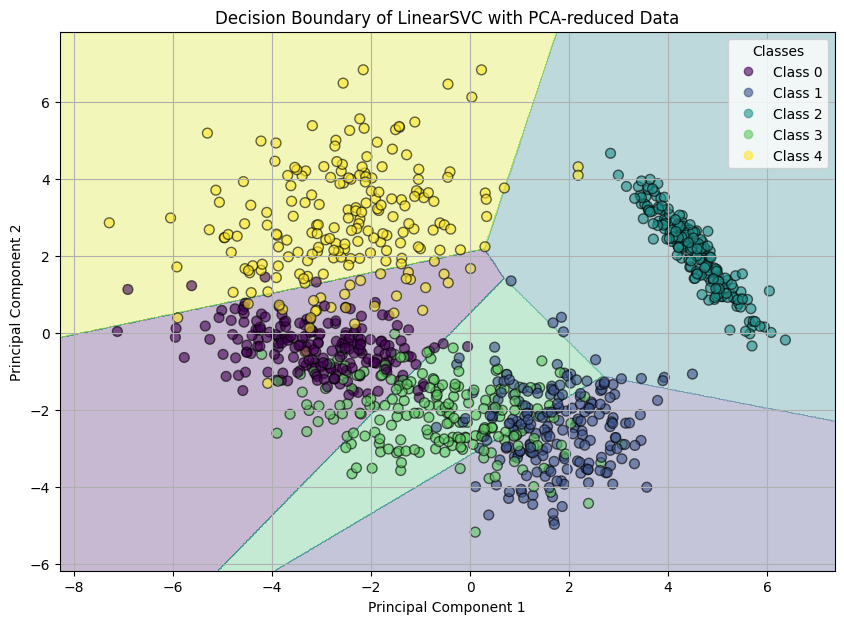

In [5]:
X,y = make_classification(n_samples=1000, n_features=16, n_informative=4,n_redundant=0, n_repeated=0, n_classes=5, n_clusters_per_class=1,class_sep=2,flip_y=0,weights=[0.2,0.2,0.2,0.2, 0.2], random_state=17)

clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50, alpha=0.6)
plt.title('Decision Boundary of LinearSVC with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'],
           title="Classes")
plt.grid(True)
plt.show()